# 1 Ejercicio 1 (20 puntos) Trabajo en Casa -Generar y graficar una distribución de datos Gaussiana (o Normal)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.66776687, 0.84073224, 1.01369761, 1.18666298, 1.35962836,
        1.53259373, 1.7055591 , 1.87852447, 2.05148984, 2.22445521,
        2.39742059, 2.57038596, 2.74335133, 2.9163167 , 3.08928207,
        3.26224744, 3.43521282, 3.60817819, 3.78114356, 3.95410893,
        4.1270743 , 4.30003967, 4.47300505, 4.64597042, 4.81893579,
        4.99190116, 5.16486653, 5.3378319 , 5.51079728, 5.68376265,
        5.85672802]),
 <a list of 30 Patch objects>)

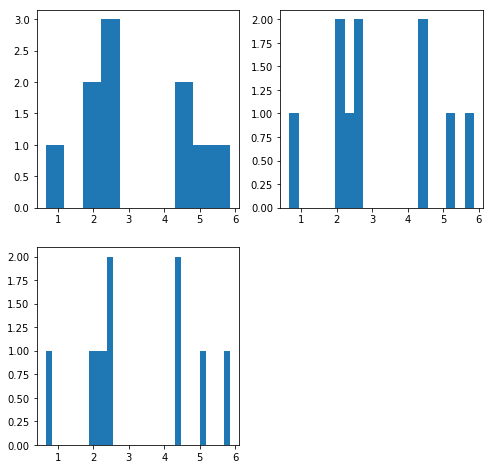

In [2]:
n = 10
data = np.random.normal(loc=3.0, scale=1.5, size=n)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax1.hist(data, bins=10)

ax2 = fig.add_subplot(222)
ax2.hist(data, bins=20)

ax3 = fig.add_subplot(223)
ax3.hist(data, bins=30)


In [3]:
np.mean(data)

3.1904765461361504

In [4]:
np.median(data)

2.505169878960534

# 2 Más gaussianas

In [5]:
def gauss(n):
    data = np.random.normal(loc=3.0, scale=1.5, size=n)

    fig = plt.figure(figsize=(8,8))
    ax1 = fig.add_subplot(221)
    ax1.hist(data, bins=10)

    ax2 = fig.add_subplot(222)
    ax2.hist(data, bins=20)

    ax3 = fig.add_subplot(223)
    ax3.hist(data, bins=50)
    
    print(np.mean(data), np.median(data))

3.0522177099624077 2.9986513479075754


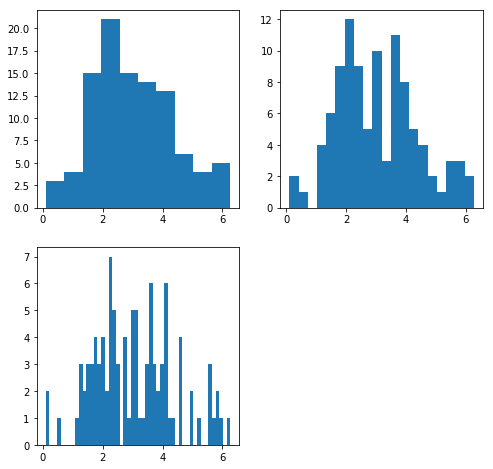

In [6]:
gauss(100)

2.9705980086762738 2.980623411299969


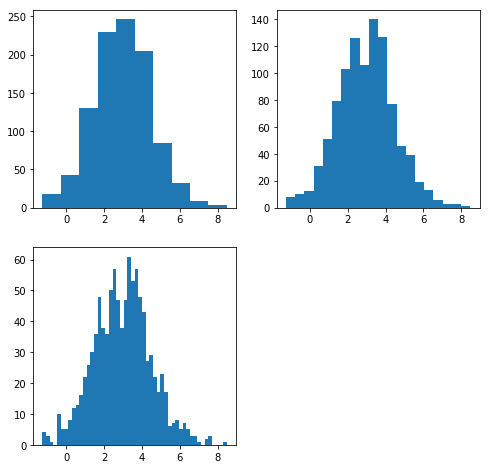

In [7]:
gauss(1000)

3.003606424849509 3.006457230432212


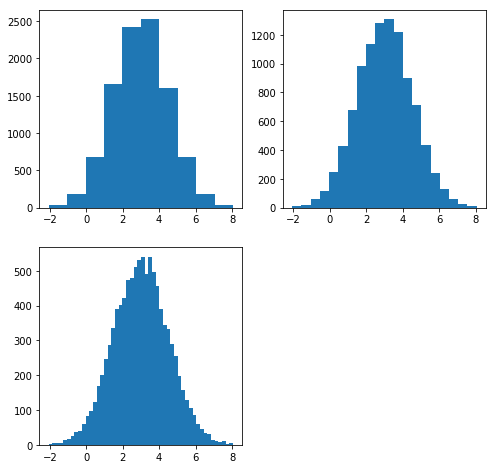

In [8]:
gauss(10000)

2.998588505312548 2.9971943199445583


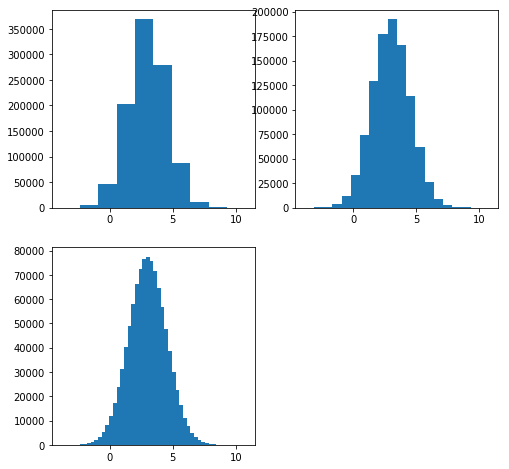

In [9]:
gauss(1000000)

# 3 Ajuste de Curvas

Vamos a trabajar con este conjunto de datos some statistical stuff.dat 2
Escriba esta función de distribución de probabilidad normalizada:

\begin{equation}
f(x,\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\mu)^2 / (2\sigma^2)}
\end{equation}

Utilizando scipy.optimize.curve fit busque los parámetros óptimos y grafique la función con los parámetros de mejor ajuste.

https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2026-201910/master/Talleres/Grupo_1/some_statistical_stuff.dat

In [10]:
!wget https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2026-201910/master/Talleres/Grupo_1/some_statistical_stuff.dat

--2019-05-24 20:56:24--  https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2026-201910/master/Talleres/Grupo_1/some_statistical_stuff.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208382 (203K) [text/plain]
Saving to: ‘some_statistical_stuff.dat.1’

some_statistical_st 100%[===================>] 203,50K  1,02MB/s    in 0,2s    

2019-05-24 20:56:25 (1,02 MB/s) - ‘some_statistical_stuff.dat.1’ saved [208382/208382]



In [11]:
data = np.loadtxt("some_statistical_stuff.dat")

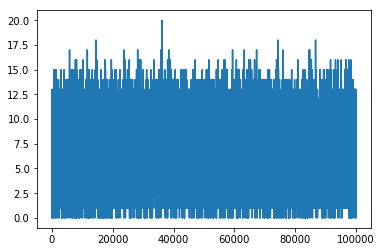

In [12]:
plot(data)

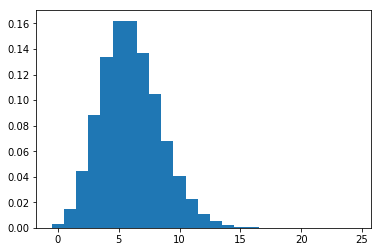

In [13]:
y, bins, algo = hist(data, bins=linspace(-0.5,24.5,26), density=True)

"y" tiene n elementos, "bins" tiene n +1 elementos. Para hacer un scatterplot necesitamos que el eje x tenga la misma dimensión.

In [14]:
print(bins)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5]


In [15]:
x = (bins[:-1] + bins[1:])/2

In [16]:
print(x)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24.]


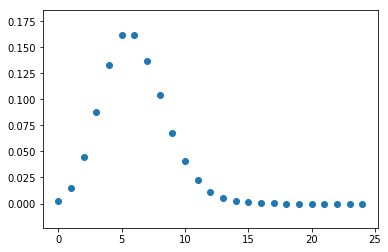

In [17]:
scatter(x,y)

In [18]:
def f(x, mu, sigma):
    return (1/(2*pi*sigma**2)**0.5) * np.exp(-(x-mu)**2 / (2*sigma**2))

In [19]:
from scipy.optimize import curve_fit

In [20]:
curve_fit(f,x,y, p0=[5,2])

(array([5.74923876, 2.41644865]), array([[ 1.82714729e-03, -5.08986528e-06],
        [-5.08986528e-06,  1.22452709e-03]]))

Guardamos los parámetros de ajuste en "popt"

In [21]:
popt, pcov = curve_fit(f,x,y, p0=[5,2])

Ahora se grafica con los parámetros de mejor ajuste

In [22]:
y_ajuste = f(x, popt[0], popt[1])

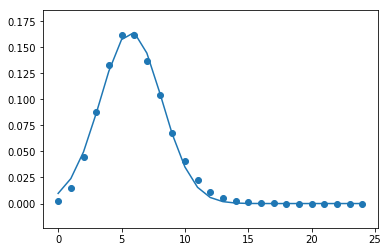

In [23]:
scatter(x,y, label="Datos originales")
plot(x,y_ajuste, label="Ajuste")

Este es el mejor ajuste que se tiene usando una distribución de probabilidad Gaussiana o normal ($f(x,\mu,\sigma)$)

# 4 Ajuste de Curvas

Ahora se intenta hacer un ajuste a otra curva de probabilidad, una distribución de Poisson
\begin{equation}
    g(k,\lambda)= \frac{\lambda^k e^{-\lambda}}{k!}
\end{equation}



In [24]:
from scipy.special import factorial

In [25]:
def g(k,l):
    return l**k * np.exp(-l) / factorial(k)

In [26]:
y_ejemplo = g(x,8)

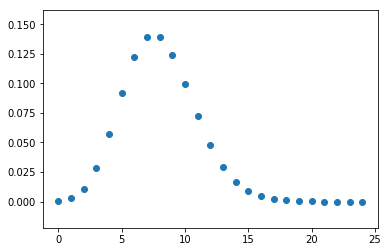

In [27]:
scatter(x,y_ejemplo)

Ahora realizamos el ajuste

In [28]:
popt, pcov = curve_fit(g,x,y)

In [29]:
y_ajuste2 = g(x,popt[0])

Y graficamos

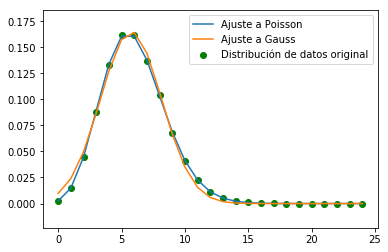

In [30]:
scatter(x,y, c="green", label="Distribución de datos original")
plot(x,y_ajuste2, label="Ajuste a Poisson")
plot(x,y_ajuste, label="Ajuste a Gauss")

legend(loc=0)


Nota:

* La distribución de Poisson solo acepta valores enteros como entrada, de allí la notación "k", el parámetro $\lambda$ es real, mayor que cero.

* El nombre de la letra griega $\lambda$ es "lambda", sin embargo este es un nombre reservado por python para construcción rápida de funciones anónimas

In [31]:
square = lambda x : x**2

In [32]:
square(5)

25

Equivalente a:

In [33]:
def square(x):
    return x**2

In [34]:
square(5)


25